<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/integrations/observation_tools/zeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="UpTrain">
  </a>
</h1>

<div style="text-align: center;">

#  Visualize LLM evaluations with UpTrain and Zeno

[Zeno](https://zenoml.com/) is an interactive AI evaluation platform for exploring, debugging, and sharing how your AI systems perform.

In this notebook, we will walk you through using UpTrain to evaluate LLM-generated responses and then visualize those evaluations using Zeno.

If you face any difficulties, need some help with using UpTrain or want to brainstorm custom evaluations for your use-case, you can speak to the maintainers of UpTrain [here](https://calendly.com/uptrain-sourabh/30min).


### Install required packages

In [1]:
# %pip install zeno-client uptrain

### Enter your Zeno API keys and OpenAI API key

You can get your Zeno API keys [here](https://hub.zenoml.com/account) and OpenAI API key [here](https://platform.openai.com/api-keys)

In [2]:
import os

ZENO_API_KEY = os.environ["ZENO_API_KEY"]
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"]

### Define a Dataset

In [3]:
data = [
    {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity."
   },
   {
      "question": "What are the symptoms of a heart attack?",
      "context": "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
      "response": "Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back."
   },
   {
      "question": "Can stress cause physical health problems?",
      "context": "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
      "response": "Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system."
   },
   {
        'question': "What causes diabetes?",
        'context': "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
        'response': "Diabetes is caused by eating too much sugar, and reducing sugar intake can cure it completely."
    },
    {
        'question': "What are the symptoms of a heart attack?",
        'context': "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
        'response': "Heart attack symptoms are usually just indigestion and can be relieved with antacids."
    },
    {
        'question': "Can stress cause physical health problems?",
        'context': "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
        'response': "Stress has no impact on physical health; it's just a mental state and doesn't affect the body."
    }
]

### Run Evaluations using UpTrain's Open-Source Software (OSS)

We have used the following 3 metrics from UpTrain's library:

1. [Context Relevance](https://docs.uptrain.ai/predefined-evaluations/context-awareness/context-relevance): Evaluates how relevant the retrieved context is to the question specified.

2. [Response Completeness](https://docs.uptrain.ai/predefined-evaluations/response-quality/response-completeness): Evaluates whether the response has answered all the aspects of the question specified.

3. [Factual Accuracy](https://docs.uptrain.ai/predefined-evaluations/context-awareness/factual-accuracy): Evaluates whether the response generated is factually correct and grounded by the provided context.

4. [Response Relevance](https://docs.uptrain.ai/predefined-evaluations/response-quality/response-relevance): Evaluates how relevant the generated response was to the question specified.

You can look at the complete list of UpTrain's supported metrics [here](https://docs.uptrain.ai/predefined-evaluations/overview)

In [4]:
from uptrain import EvalLLM, Evals
import json
import pandas as pd

eval_llm = EvalLLM(openai_api_key = OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.CONTEXT_RELEVANCE, Evals.RESPONSE_COMPLETENESS, Evals.FACTUAL_ACCURACY, Evals.RESPONSE_RELEVANCE]
)

df = pd.DataFrame(res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
2024-03-01 16:46:57.437 | WARNING  | uptrain.operators.language.llm:fetch_responses:229 - Detected a running event loop, scheduling requests in a separate thread.
100%|██████████| 6/6 [00:02<00:00,  2.30it/s]
2024-03-01 16:47:00.118 | WARNING  | uptrain.operators.language.llm:fetch_responses:229 - Detected a running event loop, scheduling requests in a separate thread.
100%|██████████| 6/6 [00:01<00:00,  3.19it/s]
2024-03-01 16:47:02.044 | WARNING  | uptrain.operators.language.llm:fetch_responses:229 - Detected a running event loop, scheduling requests in a separate thread.
100%|██████████| 6/6 [00:01<00:00,  3.70it/s]
2024-03-01 16:4

In [5]:
df

,question,context,response,score_context_relevance,explanation_context_relevance,score_response_completeness,explanation_response_completeness,score_factual_accuracy,explanation_factual_accuracy,score_response_relevance,explanation_response_relevance
0,What causes diabetes?,Diabetes is a metabolic disorder characterized...,Diabetes is primarily caused by a combination ...,1.0,"{\n ""Reasoning"": ""The given context can ans...",0.5,"{\n ""Reasoning"": ""The given response only p...",1.0,"[\n {\n ""Fact"": ""1. Diabetes is prim...",0.666667,"Response Precision: 1.0{\n ""Reasoning"": ""Th..."
1,What are the symptoms of a heart attack?,"A heart attack, or myocardial infarction, occu...",Symptoms of a heart attack may include chest p...,1.0,"{\n ""Reasoning"": ""The given context can ans...",1.0,"{\n ""Reasoning"": ""The given response is com...",1.0,"[\n {\n ""Fact"": ""1. Symptoms of a he...",1.000000,"Response Precision: 1.0{\n ""Reasoning"": ""Th..."
2,Can stress cause physical health problems?,Stress is the body's response to challenges or...,"Yes, chronic stress can contribute to various ...",1.0,"{\n ""Reasoning"": ""The given context can ans...",1.0,"{\n ""Reasoning"": ""The given response is com...",1.0,"[\n {\n ""Fact"": ""1. Chronic stress c...",1.000000,"Response Precision: 1.0{\n ""Reasoning"": ""Th..."
3,What causes diabetes?,Diabetes is a metabolic disorder characterized...,"Diabetes is caused by eating too much sugar, a...",1.0,"{\n ""Reasoning"": ""The given context can ans...",0.5,"{\n ""Reasoning"": ""The given response only p...",0.0,"[\n {\n ""Fact"": ""1. Diabetes is caus...",0.666667,"Response Precision: 1.0{\n ""Reasoning"": ""Th..."
4,What are the symptoms of a heart attack?,"A heart attack, or myocardial infarction, occu...",Heart attack symptoms are usually just indiges...,1.0,"{\n ""Reasoning"": ""The given context can ans...",0.0,"{\n ""Reasoning"": ""The given response does n...",0.0,"[\n {\n ""Fact"": ""1. Heart attack sym...",0.000000,"Response Precision: 0.0{\n ""Reasoning"": ""Th..."
5,Can stress cause physical health problems?,Stress is the body's response to challenges or...,Stress has no impact on physical health; it's ...,1.0,"{\n ""Reasoning"": ""The given context can ans...",0.0,"{\n ""Reasoning"": ""The given response doesn'...",0.0,"[\n {\n ""Fact"": ""1. Stress has no im...",0.000000,"Response Precision: 0.0{\n ""Reasoning"": ""Th..."


### Create a Project on Zeno

In [6]:
from zeno_client import ZenoClient, ZenoMetric
client = ZenoClient(ZENO_API_KEY)

project = client.create_project(
    name="UpTrain Zeno Demo",
    description="Evaluation of LLMs using UpTrain",
    public=True,
    view={
        "data": {"type": "markdown"},
        "label": {"type": "text"},
        "output": {"type": "markdown"},
    },
    metrics=[
        ZenoMetric(name="context relevance", type="mean", columns=["score_context_relevance"]),
        ZenoMetric(name="response completeness", type="mean", columns=["score_response_completeness"]),
        ZenoMetric(name="factual accuracy", type="mean", columns=["score_factual_accuracy"]),
        ZenoMetric(name="response relevance", type="mean", columns=["score_response_relevance"]),
    ],
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Successfully updated project.
Access your project at  https://hub.zenoml.com/project/92fb0c4d-caba-4631-82a3-e3535b60e127/UpTrain%20Zeno%20Demo


### Upload Input Data on Zeno Project

In [8]:
data_df = df[['question', 'context']]
data_df['id'] = data_df.index

project.upload_dataset(
    data_df, id_column="id", data_column="question", label_column="context"
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/zeno_client/util.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '1' '2' '3' '4' '5']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, id_column] = df[id_column].astype(str)
100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

Successfully uploaded data


### Upload Output Data on Zeno Project

In [9]:
output_df = df[
    [
        "score_context_relevance",
        "score_response_completeness",
        "score_factual_accuracy",
        "score_response_relevance",
    ]
].copy()

output_df["output"] = df[['response']]
output_df["id"] = output_df.index

project.upload_system(
    output_df, name="Demo", id_column="id", output_column="output"
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/zeno_client/util.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '1' '2' '3' '4' '5']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, id_column] = df[id_column].astype(str)
100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

Successfully uploaded system


You can see the evaluations using Zeno. 

Further, you can slice the data and create charts using Zeno.

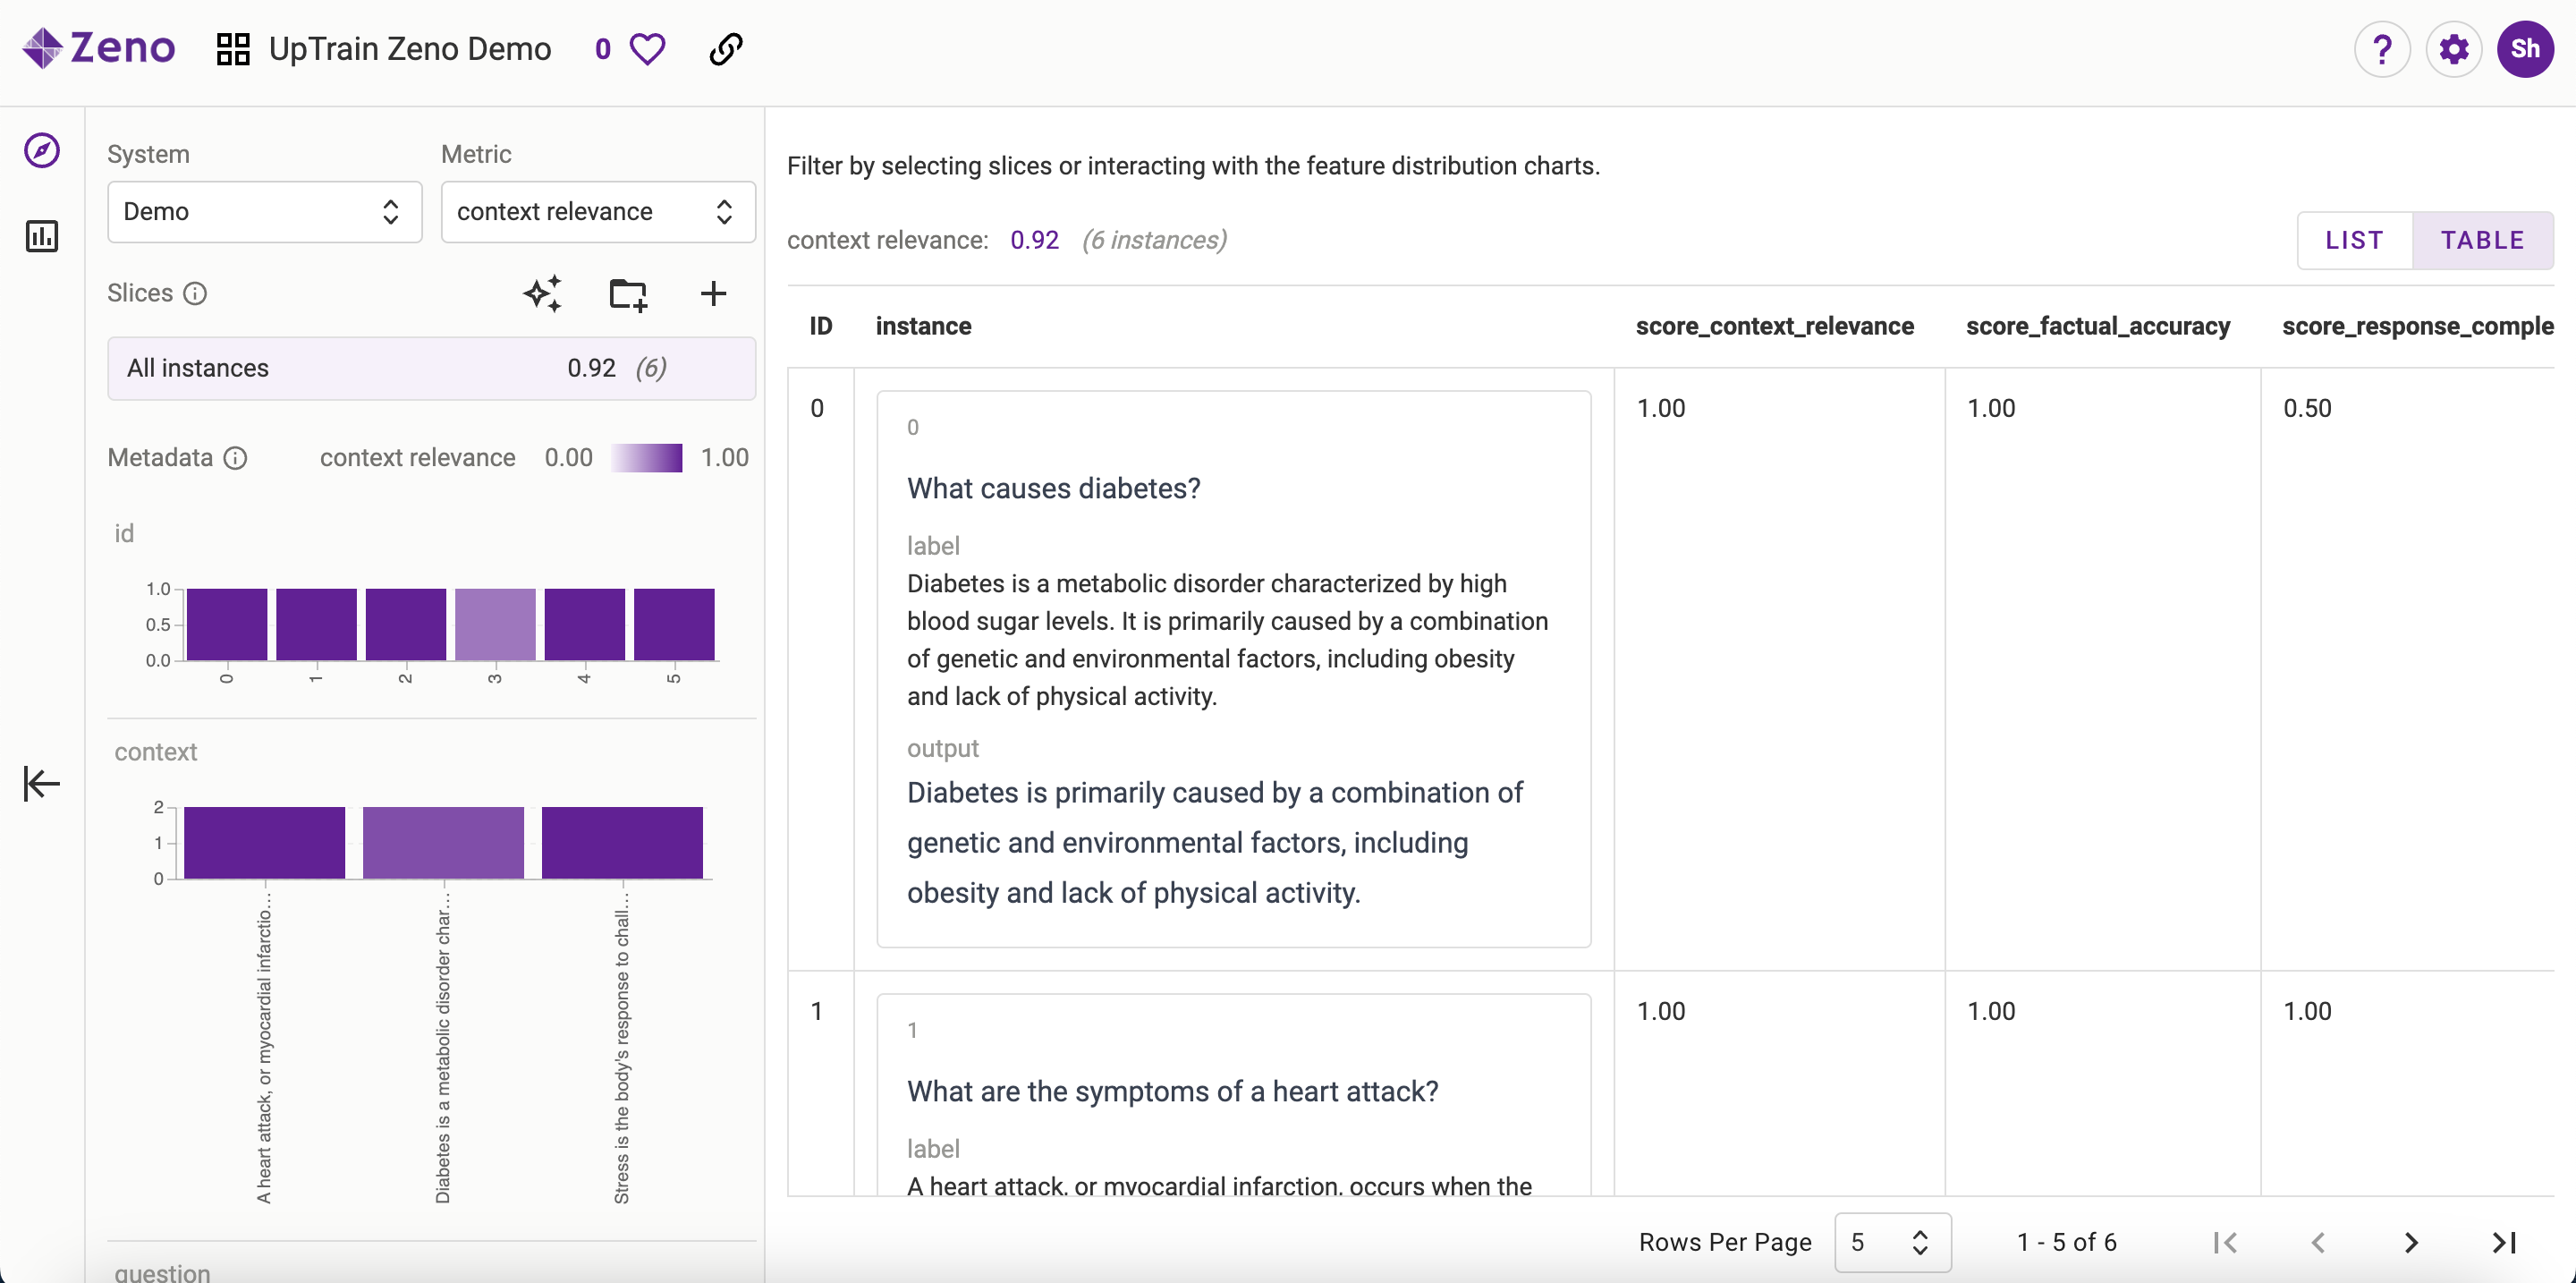